## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_03

Cloning into 'data_03'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


## 2.Colab에서 한글 폰트 사용하기

In [ ]:
###########폰트 라이브러리 불러오기#############
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -qq -y fonts-nanum

%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
mpl.font_manager._rebuild()
print('설치가 되었습니다.')

설치가 되었습니다.


In [ ]:
# 위의 코드 실행 후 colab 메뉴에서 '런타임' -> '런타임 다시 시작' 실행

In [ ]:
####### 런타임 다시 시작 후 실행 #######
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

plt.rcParams['font.family']='NanumGothic'  #폰트 설정
fm._rebuild()

In [ ]:
# <그래프 그리기 전용> - 사용할 데이터 프레임 만들기
# 1. 파일 다운로드
# 2. Colab에서 한글 폰트 사용하시 실행
# 3. 아래의 데이터 프레임 만들기 실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])
bread = bread.rename(columns={'상세영업상태코드': '상태코드'})
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
nyear = 2021    
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
func = lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1)
bread['영업기간'] = bread.apply(func, axis=1)
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp = temp.fillna(0).astype('int64')
temp
# [4-25]로 가서 그래프 실행

## 3.제과점 오픈 프로젝트

In [1]:
# [4-0] 사용라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 3-1.파일 읽어오기
- csv 파일 : pd.read_csv('파일이름', encoding='cp949', low_memory=False) 
   - encoding='cp949' : 한글이 포함되어 있는 경우 encoding 방식을 지정
   - low_memory=False : column에 여러 type의 데이터가 섞여 있으면 DtypeWarning이 발생하며 이때, dtype option으로 타입을 명시해주거나 low_memory=False를 사용한다.


In [3]:
# [4-1] 제과점에 대한 파일 './data_03/bread_data.csv'을 
# encoding='cp949' 를 사용하여 읽어와 df라는 이름을 붙인다
# low_memory=False 또는 dtype={'건물소유구분명': object, '전통업소지정번호': object}를 사용하여 Warning를 제거할 수 있음
df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', low_memory=False)
df.head()

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.40,NaN,NaN,NaN,NaN
1,2,제과점영업,07_22_18_P,3600000,3600000-121-2013-00005,20130318,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,165.00,NaN,NaN,NaN,NaN
2,3,제과점영업,07_22_18_P,3600000,3600000-121-2013-00008,20130417,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,101.25,NaN,NaN,NaN,NaN
3,4,제과점영업,07_22_18_P,3620000,3620000-121-1998-00020,19980327,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,74.31,NaN,NaN,NaN,NaN
4,5,제과점영업,07_22_18_P,3620000,3620000-121-1986-00015,19980515,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,89.04,NaN,NaN,NaN,NaN


### 3-2.데이터 구조 확인
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함

In [4]:
# [4-2] df의 행, 열의 개수를 확인한다
df.shape

(52680, 48)

In [5]:
# [4-3] df의 첫 1개 열을 출력해 확인한다
df.head(1)

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.4,NaN,NaN,NaN,NaN


In [6]:
# [4-4] df의 행, 열에 대한 개수, 각 열 별 데이터 개수 및 dtype, 
# 메모리 사용량을 확인합니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           52680 non-null  int64  
 1   개방서비스명       52680 non-null  object 
 2   개방서비스id      52680 non-null  object 
 3   개방자치단체코드     52680 non-null  int64  
 4   관리번호         52680 non-null  object 
 5   인허가일자        52680 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     52680 non-null  int64  
 8   영업상태명        52680 non-null  object 
 9   상세영업상태코드     52680 non-null  int64  
 10  상세영업상태명      52680 non-null  object 
 11  폐업일자         33669 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31967 non-null  object 
 16  소재지면적        49047 non-null  object 
 17  소재지우편번호      50885 non-null  float64
 18  소재지전체주소      52513 non-null  object 
 19  도로명전

DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : 컬럼 1개를 Series로 반환함
- DataFrame[[컬럼명1, 컬럼명2, ...]] : 컬럼 목록에 있는 컬럼을 가져옴
    - 컬럼 목록에 1개의 컬럼만 있어도 DataFrame이 반환됨

Series.value_counts() : 데이터 별 개수를 Series로 반환
- NA Value가 있다면 불포함

In [10]:
# [4-5] df의 '상세영업상태명'에 대해 값별 개수를 구합니다.
df['상세영업상태명'].value_counts(dropna=False, normalize=True)
df['상세영업상태명'].value_counts(dropna=False)

폐업    33669
영업    19011
Name: 상세영업상태명, dtype: int64

In [11]:
df['상세영업상태명'].unique()

array(['영업', '폐업'], dtype=object)

In [13]:
# [4-6] df의 '상세영업상태코드'에 대해 값별 개수를 구합니다.
# 1: 영업, 2: 폐업
df['상세영업상태코드'].value_counts(dropna=False, ascending=True)

1    19011
2    33669
Name: 상세영업상태코드, dtype: int64

In [14]:
# [4-7] df의 컬럼 중에 
# '인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명'만 가져옵니다.
# 이름을 bread로 정하고, 처음부터 3개 행을 출력해 봅니다.
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


### 3-3.파생정보 추가

Series의 str Accessor 사용
- 세부 내용 : https://pandas.pydata.org/docs/reference/series.html#string-handling 
- Series.str.split() : whitespace(공백, 탭 등)을 기준으로 문자열 분리
    - 예)  ‘서울특별시 종로구 …’  => [서울특별시, 종로구, …]
- Series.str[0] : Series가 여러 개의 요소가 있는 경우 그 첫 번째 요소 

Series.unique() : 중복 데이터의 제거 후 배열로 반환, NA Value가 있다면 포함

In [10]:
# [4-8] bread 의 '소재지전체주소' 중 시/도에 대한 정보(목록)를 추출합니다.
bread['소재지전체주소'].str.split().str[0]

0        광주광역시
1        광주광역시
2        광주광역시
3        광주광역시
4        광주광역시
         ...  
52675    울산광역시
52676    광주광역시
52677    부산광역시
52678      경기도
52679      경기도
Name: 소재지전체주소, Length: 52680, dtype: object

Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- DataFrame.loc[조건, :]
- DataFrame[조건]
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
    - (조건1) | (조건2)  : 조건1 또는 조건2를 만족하는 데이터
    - (조건1) & (조건2)  : 조건1, 조건2 모두 만족하는 데이터
    - ~(조건) : 조건이 거짓인 데이터

In [17]:
bread['업태구분명'].value_counts(dropna=False)

제과점영업    52653
푸드트럭        16
NaN          6
룸살롱          1
과자점          1
한식           1
기타           1
분식           1
Name: 업태구분명, dtype: int64

In [19]:
# [4-9] bread에서 소재지전체주소의 처음이 '서울특별시'이면서,
# '업태구분명'이 '제과점영업'인 것만 추출합니다.
bread = bread.loc[(bread['소재지전체주소'].str.split().str[0] == '서울특별시') & (bread['업태구분명'] == '제과점영업'),:]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
1055,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업
1056,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업
1057,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업


In [21]:
# [4-10] df, bread의 행/열 정보를 확인합니다.
df.shape, bread.shape

((52680, 48), (12052, 6))

DataFrame에 새로운 컬럼 추가
- DataFrame['컬럼명'] = 데이터
- 데이터의 개수는 기존 다른 컬럼의 행 개수와 같아야 함


In [22]:
# [4-11] bread의 '소재지전체주소'에서 '구명', '동명'을 추출하여 
# bread에 새로운 컬럼으로 등록합니다.
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]

# bread의 컬럼명을 출력해 '구명', '동명'이 추가되었는지 확인함
bread.columns

Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

In [23]:
import shelve

with shelve.open('./data_03/bread.dat') as sh:
    sh['bread'] = bread

Accessor 연습 LAB : https://colab.research.google.com/drive/1tkrP-1VWZYZ1Zl_9KrlkPBpVHWBMUlCy

Accessor 연습 Teacher : https://colab.research.google.com/drive/1Szy5ZjK7hM6E7utgPIbAgwDAxcWWpwO5

### 3-4.결측치 확인/처리

결측치는 값이 없음을 나타냄 
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음

DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수

In [26]:
s = pd.Series([pd.NA, np.nan])
s

0    <NA>
1     NaN
dtype: object

In [27]:
s.value_counts()

Series([], dtype: int64)

In [28]:
s.unique()

array([<NA>, nan], dtype=object)

In [29]:
s.value_counts(dropna=False)

<NA>    1
NaN     1
dtype: int64

In [30]:
with shelve.open('./data_03/bread.dat') as sh:
    bread = sh['bread']

bread.head()

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
1055,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업,은평구,대조동
1056,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업,은평구,갈현동
1057,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업,은평구,녹번동
1058,20011015,1,NaN,서울특별시 은평구 불광동 631-1번지 (지하1층)대호상가아파트,브르망,제과점영업,은평구,불광동
1059,20050406,1,NaN,서울특별시 중랑구 중화동 288-27,케잌하우스밀레,제과점영업,중랑구,중화동


In [31]:
# [4-12] bread의 각 컬럼별 결측치의 개수를 확인합니다.
bread.isna().sum()

인허가일자          0
상세영업상태코드       0
폐업일자        3955
소재지전체주소        0
사업장명           0
업태구분명          0
구명             0
동명             0
dtype: int64

결측치 채우기
- DataFrame.fillna(값) : 결측치를 특정 값으로 채움

데이터 타입 변경 방법
- Series.astype(타입)
- 타입 표시 방법 : 'int', 'int32', 'int64', 'float', 'str', 'category',  ... 등의 문자열로 지정 
- np.int16, np.float32, np.datetime64, ... 등의 numpy 타입으로 지정
- numpy 타입으로 지정하기 위해서는  ```import numpy as np```  를 먼저 실행하여야 함

In [35]:
# [4-13] bread의 '폐업일자'에 대해 결측치인 것을 0.0으로 채우기 한 뒤, 
# 데이터 타입을 'int64'로 수정합니다.
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')

In [36]:
# [4-14] bread의 전체 결측치의 개수를 하나의 정수로 확인합니다.
bread.isna().sum().sum()

0

In [38]:
bread.isna().any().any()

False

DataFrame에서 컬럼을 제거 함
- DataFrame.drop(columns=['컬럼명1', '컬럼명2', ...])
- DataFrame.drop(['컬럼명1', '컬럼명2', ...], axis=1)


In [39]:
# [4-15] bread2에서 '소재지전체주소' 및 '업태구분명' 컬럼을 제거한 뒤, shape을 확인합니다.
bread.drop(['소재지전체주소', '업태구분명'], axis=1).shape

(12052, 6)

In [40]:
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])

In [41]:
# [4-16] bread의 첫 3개 행을 확인합니다.
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,사업장명,구명,동명
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1056,20030507,1,0,파리바게뜨,은평구,갈현동
1057,20021011,1,0,신라명과(역촌현대점),은평구,녹번동


컬럼이름 변경하기
- DataFrame.rename(columns={'변경전이름':'변경후이름', ...})
- DataFrame.rename({'변경전이름':'변경후이름', ...}, axis=1)

In [42]:
# [4-17] bread2의 '상세영업상태코드'라는 컬럼명을 '상태코드'로 변경한 뒤,
# 첫 2개의 행을 확인합니다.
bread.rename({'상세영업상태코드':'상태코드'}, axis=1).head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1056,20030507,1,0,파리바게뜨,은평구,갈현동


In [45]:
bread = bread.rename(columns={'상세영업상태코드':'상태코드'})

In [46]:
bread.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1056,20030507,1,0,파리바게뜨,은평구,갈현동
1057,20021011,1,0,신라명과(역촌현대점),은평구,녹번동


CSV 파일로 저장하기
- DataFrame.to_csv('파일이름', index=False) : index를 제외한 내용을 csv 파일로 저장함

In [48]:
# [4-18] bread2를 'bread_after.csv' 파일로 index를 제외하고 저장합니다.
bread.to_csv('./data_03/bread_after.csv', index=False)

In [49]:
# [4-19] 'bread_after.csv' 파일을 읽어 bread라는 이름으로 저장합니다.
bread = pd.read_csv('./data_03/bread_after.csv')
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동


### 3-5.설립년도,폐업년도 분석

Series의 연산
- Series는 스칼라값과 연산 시 각 값과 스칼라 값의 연산이 이루어짐
- 결과는 Series가 됨

In [50]:
bread.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12052 entries, 0 to 12051
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인허가일자   12052 non-null  int64 
 1   상태코드    12052 non-null  int64 
 2   폐업일자    12052 non-null  int64 
 3   사업장명    12052 non-null  object
 4   구명      12052 non-null  object
 5   동명      12052 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.4 MB


In [52]:
# [4-20] bread에 '설립년도' 및 '폐업년도' 컬럼을 추가합니다.
# '인허가일자'//10000, '폐업일자 // 10000 을 사용하여 구합니다.
# 두 개의 컬럼이 추가된 bread의 첫 2개 행을 확인합니다.
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0


In [56]:
# [4-21] bread에 '영업기간' 컬럼을 추가합니다
# '영업기간'은 '상태코드'가 1(=영업)인 경우 2021 - 설립년도 + 1
# '상태코드'가 2(=폐업)인 경우 폐업년도 - 설립년도 + 1로 계산합니다.
nyear = 2023
bread.loc[bread['상태코드'] == 1, '영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드'] == 2, '영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
bread.head()

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,23.0
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,21.0
2,20021011,1,0,신라명과(역촌현대점),은평구,녹번동,2002,0,22.0
3,20011015,1,0,브르망,은평구,불광동,2001,0,23.0
4,20050406,1,0,케잌하우스밀레,중랑구,중화동,2005,0,19.0


In [60]:
from datetime import datetime
today = datetime.today()
print(today)
print(today.year, today.month, today.day)

2023-04-30 21:06:00.727672
2023 4 30


In [64]:
from datetime import datetime
nyear = datetime.today().year

def calculate_sales_period(data):
    return (nyear - data['설립년도'] + 1) if data['상태코드'] == 1 else (data['폐업년도'] - data['설립년도'] + 1)

bread['영업기간'] = bread.apply(calculate_sales_period, axis=1)

In [65]:
bread.tail()

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
12047,20201218,2,20201225,나폴레옹과자점,서초구,반포동,2020,2020,1
12048,20201218,2,20201225,르몽블랑,서초구,반포동,2020,2020,1
12049,20210119,2,20210220,리암스(Liam's),서초구,반포동,2021,2021,1
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021,1
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021,2


In [70]:
nyear = datetime.today().year
bread['영업기간'] = bread.apply(lambda x : (nyear - x['설립년도'] + 1) if x['상태코드'] == 1 else (x['폐업년도'] - x['설립년도'] + 1), axis=1)

In [71]:
bread.tail()

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
12047,20201218,2,20201225,나폴레옹과자점,서초구,반포동,2020,2020,1
12048,20201218,2,20201225,르몽블랑,서초구,반포동,2020,2020,1
12049,20210119,2,20210220,리암스(Liam's),서초구,반포동,2021,2021,1
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021,1
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021,2


In [74]:
print(bread.영업기간)

0        23
1        21
2        22
3        23
4        19
         ..
12047     1
12048     1
12049     1
12050     1
12051     2
Name: 영업기간, Length: 12052, dtype: int64


Series를 DataFrame으로 만들기
- pd.DataFrame(Series)
- Series.to_frame()

DataFrame의 index 정렬하기
- DataFrame.sort_index() : 오름차순 정렬
- DataFrame.sort_index(ascending=False) : 내림차순 정렬

DataFrame의 전치행렬 구하기
- DataFrame.T


In [76]:
# [4-22] bread의 '설립년도'별 데이터 수를 구해 년도별로 정렬하고, 
# DataFrame으로 변경하여 전치행렬을 구해 temp1 이름을 부여해 출력합니다.
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().transpose()
temp1

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,1,1,1,11,5,10,20,12,9,5,...,378,431,474,572,644,623,538,546,502,433


In [77]:
# [4-23] bread의 '폐업년도'별 데이터 수를 구해 년도별로 정렬하고, 
# DataFrame으로 변경하여 전치행렬을 구해 temp2 이름을 부여해 출력합니다.
temp2 = pd.DataFrame(bread['폐업년도'].value_counts().sort_index()).T
temp2

,0,1984,1988,1989,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
폐업년도,3955,1,2,1,33,4,35,29,16,24,...,475,374,396,447,469,612,518,514,515,349


여러 개의 데이터프레임 합치기
- pd.concat([DataFrame1, DataFrame2, ...])
- DataFrame의 목록에 있는 순서대로 위 -> 아래 방향으로 합쳐 한 개 DataFrame 반환

In [81]:
# [4-23] temp1, temp2를 합쳐서 temp라고 이름 붙입니다.
temp = pd.concat([temp1, temp2], join='outer')
temp

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
설립년도,1.0,1.0,1.0,11.0,5.0,10.0,20.0,12.0,9.0,5.0,...,431,474,572,644,623,538,546,502,433,NaN
폐업년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,374,396,447,469,612,518,514,515,349,3955.0


In [82]:
# [4-24] temp의 결측치를 0으로 채우기 한 뒤, 'int64'로 변경합니다.
temp = temp.fillna(0).astype(np.int64)
temp

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
설립년도,1,1,1,11,5,10,20,12,9,5,...,431,474,572,644,623,538,546,502,433,0
폐업년도,0,0,0,0,0,0,0,0,0,0,...,374,396,447,469,612,518,514,515,349,3955


#### 그래프 그리기

In [83]:
temp.sort_index()

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
설립년도,1,1,1,11,5,10,20,12,9,5,...,431,474,572,644,623,538,546,502,433,0
폐업년도,0,0,0,0,0,0,0,0,0,0,...,374,396,447,469,612,518,514,515,349,3955


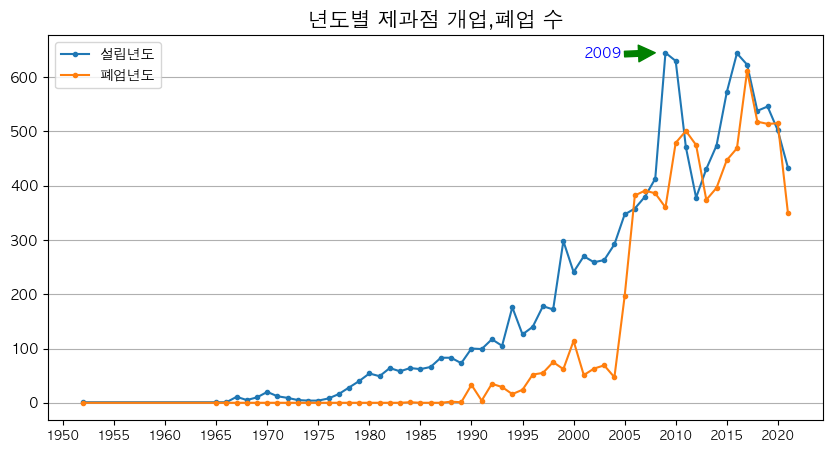

In [107]:
# [4-25] 년도별 제과정 개업, 폐업에 대한 선 그래프 그리기
dataT = temp.iloc[:, :-1].T
dataT.plot.line(figsize=(10,5), marker='o', markersize=3)
plt.xticks(range(1950, 2025, 5), fontsize=9)
plt.title('년도별 제과점 개업,폐업 수', fontsize=15)
plt.grid(True, axis='y')

plt.annotate('2009', (2008,645), (2001,635), arrowprops={'color':'green'}, fontsize=10, color='blue')
plt.show()

### 3-6.평균 영업기간 분석

특정 문자열이 포함된 행 가져오기
- Series.str.contains(문자열) : 문자열이 포함된 행은 True, 아니면 False인 Series 반환
- DataFrame.loc[조건, :] : 조건이 True인 행만 가져오기

In [108]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12052 entries, 0 to 12051
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인허가일자   12052 non-null  int64 
 1   상태코드    12052 non-null  int64 
 2   폐업일자    12052 non-null  int64 
 3   사업장명    12052 non-null  object
 4   구명      12052 non-null  object
 5   동명      12052 non-null  object
 6   설립년도    12052 non-null  int64 
 7   폐업년도    12052 non-null  int64 
 8   영업기간    12052 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 847.5+ KB


In [110]:
# [4-26] bread에서 '사업장명' 컬럼을 사용하여 
# '파리바게트', '파리바게뜨' 이름인 곳을 뽑아 paris로 이름 붙입니다.
paris = bread.loc[bread['사업장명'].str.contains('파리바게트|파리바게뜨'), :]
paris.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,23
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,21
6,20060417,1,0,파리바게뜨(우림시장점),중랑구,망우동,2006,0,18


In [111]:
# [4-27] bread에서 '사업장명' 컬럼을 사용하여 
# '뚜레쥬르' 이름인 곳을 뽑아 tous로 이름 붙입니다.
tous = bread.loc[bread['사업장명'].str.contains('뚜레쥬르'),:]
tous.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
5,20050412,1,0,뚜레쥬르,중랑구,신내동,2005,0,19
7,20060822,1,0,뚜레쥬르사가정역점,중랑구,면목동,2006,0,18
14,20070416,1,0,뚜레쥬르용마산역점,중랑구,면목동,2007,0,17


In [115]:
print(paris.shape, tous.shape)

(1059, 9) (586, 9)


통계값 알아보기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.cumsum() : 누적합
- Series.quantile([0.25, 05, 0.75]) : 분위수

In [116]:
# [4-28] 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000) & (paris['상태코드'] == 1), '영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000) & (tous['상태코드'] == 1), '영업기간']
# temp1, temp2의 평균을 구해 이름을 comp로 하는 DataFrame으로 만듭니다. 
# index => ['파리바게트', '뚜레쥬르'], columns => ['영업']
comp = pd.DataFrame(data=[temp1.mean(), temp2.mean()], index=['파리바게트', '뚜레쥬르'], columns=['영업'])
comp

,영업
파리바게트,14.357022
뚜레쥬르,11.796296


In [117]:
# [4-29] 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000) & (paris['상태코드'] == 2), '영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000) & (tous['상태코드'] == 2), '영업기간']
# temp1, temp2의 평균을 구해 comp에 '폐업' 컬럼으로 추가합니다.
comp['폐업'] = pd.Series(data= [temp1.mean(), temp2.mean()], index=['파리바게트', '뚜레쥬르'])
comp

,영업,폐업
파리바게트,14.357022,7.712687
뚜레쥬르,11.796296,7.309028


In [120]:
# [4-30] 파리바게트, 뚜레쥬르가 아닌 다른 사업장에 대한 정보를 찾아 other로 이름 붙입니다.
other = bread.loc[~(bread['사업장명'].str.contains(r'파리바게트|파리바게뜨|뚜레쥬르', regex=True)), :]
# other의 행, 열 정보를 확인합니다.
other.shape

(10407, 9)

In [125]:
print(bread.shape[0], paris.shape[0] + tous.shape[0] + other.shape[0])

12052 12052


In [66]:
# [4-31] other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한 뒤 
# temp1, temp2 이름을 붙입니다.
temp1 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드'] == 1), '영업기간']
temp2 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드'] == 2), '영업기간']
# temp1, temp2의 평균을 구해 comp 에 '나머지' 행으로 추가합니다.
comp.loc['나머지'] = [temp1.mean(), temp2.mean()]
comp

,영업,폐업
파리바게트,9.930784,7.389655
뚜레쥬르,7.635848,7.005172
나머지,4.706053,4.851089


### 3-7.구별 폐업비율 분석


In [153]:
paris.head()

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,23
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,21
6,20060417,1,0,파리바게뜨(우림시장점),중랑구,망우동,2006,0,18
9,20061122,1,0,파리바게뜨,중랑구,망우동,2006,0,18
10,20070115,1,0,파리바게뜨 용마산역점,중랑구,면목동,2007,0,17


In [154]:
# [4-32] paris에서 영업 중인 곳에 대해 '구명'별 개수를 구해 DataFrame으로 변환하고
# temp로 이름 붙인 뒤, 첫 2개 행을 출력한다

temp = paris.loc[paris['상태코드'] == 1, '구명'].value_counts().to_frame()
temp.head(2)

,구명
강남구,59
송파구,49


 DataFrame.reset_index()
 - index의 내용을 columns로 이동함

In [155]:
# [4-33] paris에서 폐업한 곳에 대해 '구명'별 개수를 구해 
# temp에 '폐업'이라는 컬럼으로 추가하고,
# reset_index()를 사용하여 index를 columns로 사용되도록 한다. (temp2로 다시 저장)
temp['폐업'] = paris.loc[paris['상태코드'] == 2, '구명'].value_counts()

In [156]:
temp2 = temp.reset_index()

In [157]:
temp2.head()

,index,구명,폐업
0,강남구,59,28
1,송파구,49,20
2,서초구,38,24
3,영등포구,37,22
4,강서구,34,13


DataFrame의 모든 컬럼이름 변경
- DataFrame.columns = [컬럼이름1, 컬럼이름2, ...]
- 기존 컬럼의 개수와 같아야 함

In [158]:
# [4-34] temp2의 컬럼명을 ['구', '영업', '폐업']으로 변경한다
temp2.columns = ['구', '영업', '폐업']

# temp2의 첫 2개 행을 출력한다
temp2.head(2)

,구,영업,폐업
0,강남구,59,28
1,송파구,49,20


In [160]:
# [4-35] temp2에 '폐업비율' 컬럼을 추가한다
# 폐업비율 = 폐업비율 / (폐업 + 영업) * 100
temp2['폐업비율'] = temp2['폐업'] / (temp2['폐업'] + temp2['영업']) * 100
# temp2의 첫 3개 행을 출력한다
temp2.head(3)

,구,영업,폐업,폐업비율
0,강남구,59,28,32.183908
1,송파구,49,20,28.985507
2,서초구,38,24,38.709677


데이터 정렬
- DataFrame.sort_values('컬럼이름') : 주어진 컬럼을 기준으로 데이터를 오름차순 정렬
- DataFrame.sort_values('컬럼이름', ascending=False) : 내림차순 정렬
- DataFrame.sort_values(['컬럼이름1', '컬럼이름2'..]) : 다차 정렬

In [161]:
# [4-36] temp2를 폐업비율을 기준으로 오름차순 정렬하여 TOP5를 출력한다
# 폐업비율이 가장 작은 곳은 은평구, 동대문구 ... 등으로 정보를 찾게 됨
temp2.sort_values('폐업비율', ascending=True).head()

,구,영업,폐업,폐업비율
6,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727


Series.quantile([rate1, rate2, ...])
- 데이터를 순서대로 나열했을 때, 특정 비율 위치의 값을 구함
- 0 : 가장 작은 것의 값
- 1 : 가장 큰 것의 값

Series.quantile([0.3, 0.9])
- 0.3 : 하위 30% 위치
- 0.9 : 상위 10% 위치 

In [166]:
# [4-37] temp에서 폐업비율 하위 30%인 곳을 구하시오.
temp2.loc[temp2['폐업비율'] <= temp2['폐업비율'].quantile(0.3), :]

,구,영업,폐업,폐업비율
1,송파구,49,20,28.985507
4,강서구,34,13,27.659574
6,은평구,33,6,15.384615
8,구로구,30,10,25.000000
12,동대문구,27,5,15.625000
15,성동구,26,10,27.777778
17,도봉구,21,4,16.000000
23,강북구,16,6,27.272727


In [168]:
# [4-38] temp에서 폐업비율 상위 20%인 곳을 구하시오.
temp2.loc[temp2['폐업비율'] >= temp2['폐업비율'].quantile(0.8), :]

,구,영업,폐업,폐업비율
11,강동구,28,25,47.169811
18,용산구,20,16,44.444444
20,광진구,19,16,45.714286
22,금천구,17,14,45.161290
24,종로구,12,12,50.000000


### 3-8.시각화

In [ ]:
## 그래프만 그리는 경우 목차에서 1, 2 번 + DataFrame 만들기 수행하신 뒤 다음을 수행하시면 됩니다.

In [ ]:
# [4-39] 파리바게트의 구별 영업, 폐점장 수 구하기
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
data = pd.DataFrame()
data['영업'] = paris.loc[paris['상태코드']==1, '구명'].value_counts().to_frame()
data['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
data.head()

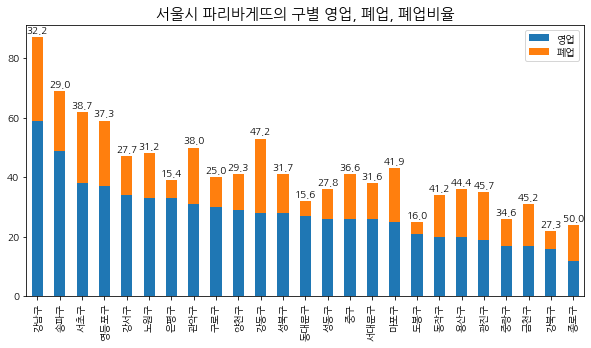

In [ ]:
# [4-40] 누적 bar 그래프 그리기


In [ ]:
# [4-41] bread를 사용하여 은평구에서 영업 중인 동별 빵집 개수를 구해 봅니다


진관동    30
응암동    24
대조동    20
신사동    17
불광동    17
역촌동    16
갈현동    15
녹번동    12
구산동    11
증산동     8
수색동     3
Name: 동리명, dtype: int64

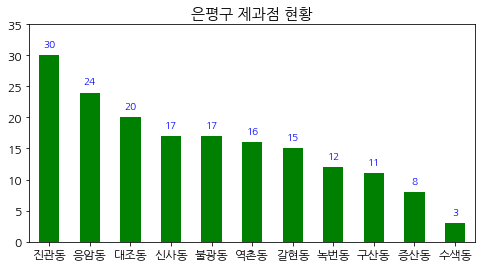

In [ ]:
# [4-42] 은평구의 동별 빵집 개수를 그래프로 표시해 봅니다.


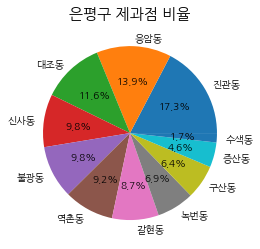

In [ ]:
# [4-43] 은평구의 동별 빵집 비율을 원행 그래프로 표시해 봅니다.



In [ ]:
"파리바게뜨, 은평구 성공적!"